
# Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

# Loading Dataset

In [2]:
path = r'C:\Users\Jamna\Downloads\Synthetic_Software_Sales_Data.csv'
data = pd.read_csv(path)

# Checking First and last 5 Rows

In [3]:
data.head()

,Date of Sale,Region,Product Type,Sales Channel,Customer Type,Sales Amount in US$,Units Sold,Marketing Spend in US$,Returning Customer
0,01-01-2022,South America,CRM,Partner,Business,7723,16,793,Yes
1,02-01-2022,Australia,DevTools,Partner,Consumer,8681,15,725,Yes
2,03-01-2022,Asia,DevTools,Partner,Consumer,5240,8,587,No
3,04-01-2022,Australia,Database,Partner,Business,9933,15,1810,Yes
4,05-01-2022,Australia,CRM,Online,Consumer,215,1,933,Yes


In [4]:
data.tail()

,Date of Sale,Region,Product Type,Sales Channel,Customer Type,Sales Amount in US$,Units Sold,Marketing Spend in US$,Returning Customer
3645,27-12-2022,Europe,ERP,Direct Sales,Consumer,5389,12,807,Yes
3646,28-12-2022,Asia,Database,Partner,Business,3083,10,1874,Yes
3647,29-12-2022,Asia,Antivirus,Direct Sales,Business,2921,16,1885,No
3648,30-12-2022,Australia,ERP,Partner,Business,3958,3,719,Yes
3649,31-12-2022,South America,DevTools,Online,Business,106,8,1586,Yes


# Checking data by Statistical means

In [5]:
data.describe()

,Sales Amount in US$,Units Sold,Marketing Spend in US$
count,3650.000000,3650.000000,3650.000000
mean,5056.085205,10.020548,1242.615616
std,2844.504925,5.504562,433.094913
min,101.000000,1.000000,500.000000
25%,2636.250000,5.000000,863.000000
50%,5066.000000,10.000000,1241.500000
75%,7462.000000,15.000000,1615.750000
max,9998.000000,19.000000,2000.000000


# Getting info on type of data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date of Sale            3650 non-null   object
 1   Region                  3650 non-null   object
 2   Product Type            3650 non-null   object
 3   Sales Channel           3650 non-null   object
 4   Customer Type           3650 non-null   object
 5   Sales Amount in US$     3650 non-null   int64 
 6   Units Sold              3650 non-null   int64 
 7   Marketing Spend in US$  3650 non-null   int64 
 8   Returning Customer      3650 non-null   object
dtypes: int64(3), object(6)
memory usage: 256.8+ KB


# Handling missing and Null values

In [7]:
data.isnull().sum()

Date of Sale              0
Region                    0
Product Type              0
Sales Channel             0
Customer Type             0
Sales Amount in US$       0
Units Sold                0
Marketing Spend in US$    0
Returning Customer        0
dtype: int64

In [8]:
data.drop_duplicates()

,Date of Sale,Region,Product Type,Sales Channel,Customer Type,Sales Amount in US$,Units Sold,Marketing Spend in US$,Returning Customer
0,01-01-2022,South America,CRM,Partner,Business,7723,16,793,Yes
1,02-01-2022,Australia,DevTools,Partner,Consumer,8681,15,725,Yes
2,03-01-2022,Asia,DevTools,Partner,Consumer,5240,8,587,No
3,04-01-2022,Australia,Database,Partner,Business,9933,15,1810,Yes
4,05-01-2022,Australia,CRM,Online,Consumer,215,1,933,Yes
...,...,...,...,...,...,...,...,...,...
3645,27-12-2022,Europe,ERP,Direct Sales,Consumer,5389,12,807,Yes
3646,28-12-2022,Asia,Database,Partner,Business,3083,10,1874,Yes
3647,29-12-2022,Asia,Antivirus,Direct Sales,Business,2921,16,1885,No
3648,30-12-2022,Australia,ERP,Partner,Business,3958,3,719,Yes


# Converting Data Types

In [9]:
data["Date of Sale"] = pd.to_datetime(data["Date of Sale"], format="%d-%m-%Y", errors="coerce")

# Verifying Data Type

In [10]:
data.dtypes

Date of Sale              datetime64[ns]
Region                            object
Product Type                      object
Sales Channel                     object
Customer Type                     object
Sales Amount in US$                int64
Units Sold                         int64
Marketing Spend in US$             int64
Returning Customer                object
dtype: object

# Exploratory Data Analysis (EDA)

In [11]:
print("Descriptive statistics of the cleaned dataset:")
display(data.describe())

Descriptive statistics of the cleaned dataset:


,Date of Sale,Sales Amount in US$,Units Sold,Marketing Spend in US$
count,3650,3650.000000,3650.000000,3650.000000
mean,2022-07-02 00:00:00.000000256,5056.085205,10.020548,1242.615616
min,2022-01-01 00:00:00,101.000000,1.000000,500.000000
25%,2022-04-02 00:00:00,2636.250000,5.000000,863.000000
50%,2022-07-02 00:00:00,5066.000000,10.000000,1241.500000
75%,2022-10-01 00:00:00,7462.000000,15.000000,1615.750000
max,2022-12-31 00:00:00,9998.000000,19.000000,2000.000000
std,NaN,2844.504925,5.504562,433.094913


# Plot : Sales Over Time

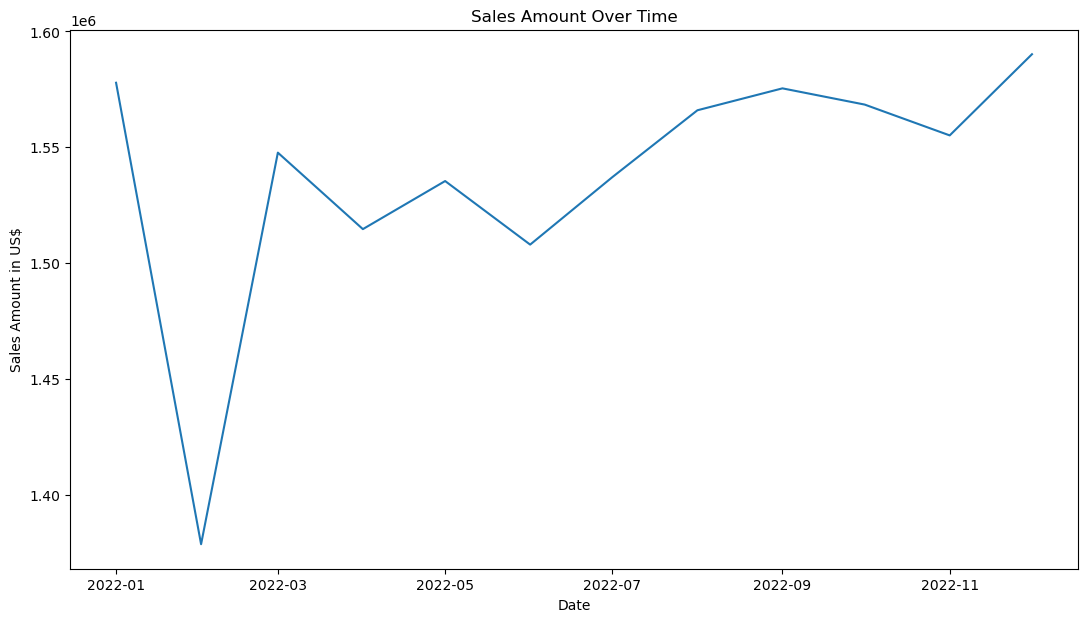

In [12]:
# Group by 'Date of Sale' to see sales trends over time
data_trends = data.groupby(data['Date of Sale'].dt.to_period('M')).agg({
    'Sales Amount in US$': 'sum',
    'Units Sold': 'sum'
}).reset_index()

# Convert 'Date of Sale' back to datetime for plotting
data_trends['Date of Sale'] = data_trends['Date of Sale'].dt.to_timestamp()

# Plot sales trends over time
plt.figure(figsize=(13, 7))
sns.lineplot(data=data_trends, x='Date of Sale', y='Sales Amount in US$')
plt.title('Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount in US$')
plt.show()


# Plot : Best Performing Region

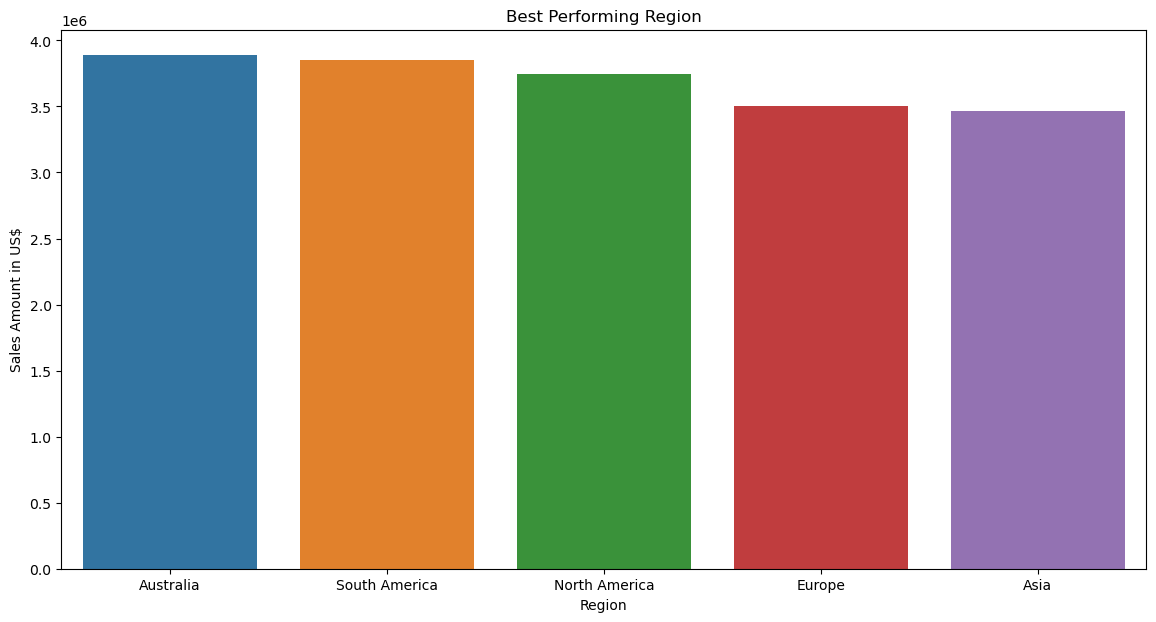

In [13]:
# Aggregate data by region
best_regions = data.groupby('Region').agg({
    'Sales Amount in US$': 'sum',
    'Units Sold': 'sum'
}).reset_index().sort_values(by='Sales Amount in US$', ascending=False)

# Plot best-performing regions
plt.figure(figsize=(14, 7))
sns.barplot(data=best_regions, x='Region', y='Sales Amount in US$')
plt.title('Best Performing Region')
plt.xlabel('Region')
plt.ylabel('Sales Amount in US$')
plt.show()

# Plot : Best Performing Product

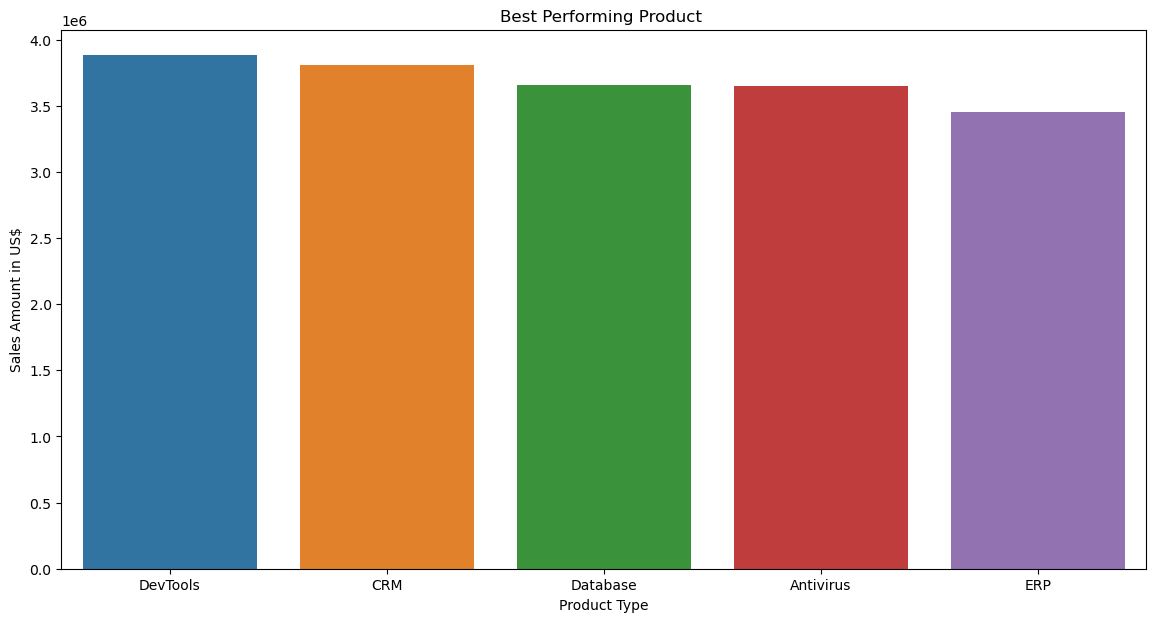

In [14]:
# Aggregate data by product type
best_products = data.groupby('Product Type').agg({
    'Sales Amount in US$': 'sum',
    'Units Sold': 'sum'
}).reset_index().sort_values(by='Sales Amount in US$', ascending=False)

# Plot best-performing product types
plt.figure(figsize=(14, 7))
sns.barplot(data=best_products, x='Product Type', y='Sales Amount in US$')
plt.title('Best Performing Product ')
plt.xlabel('Product Type')
plt.ylabel('Sales Amount in US$')
plt.show()


# Sales By Channel

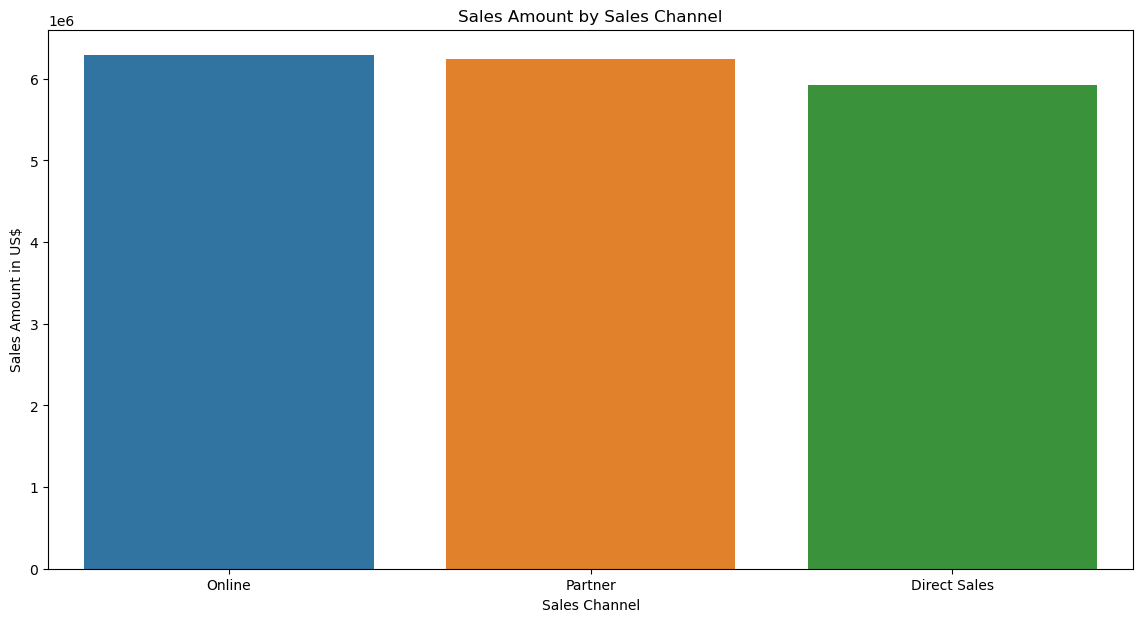

In [15]:
# Aggregate data by sales channel
best_channels = data.groupby('Sales Channel').agg({
    'Sales Amount in US$': 'sum',
    'Units Sold': 'sum'
}).reset_index().sort_values(by='Sales Amount in US$', ascending=False)

# Plot best-performing sales channels
plt.figure(figsize=(14, 7))
sns.barplot(data=best_channels, x='Sales Channel', y='Sales Amount in US$')
plt.title('Sales Amount by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Sales Amount in US$')
plt.show()


In [16]:
# Plot : Total Sales and Units Sold by Cutomer Type

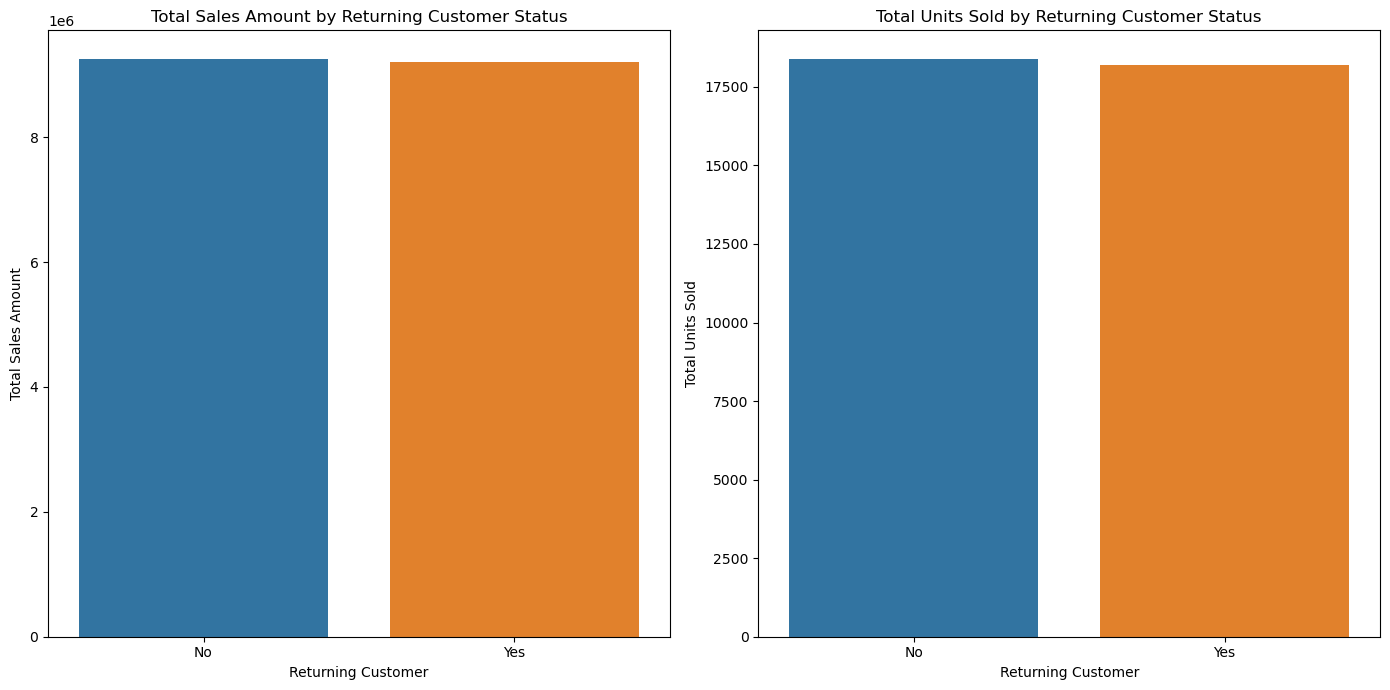

In [17]:

# Aggregate data by returning customer status
customer_purchase_patterns = data.groupby('Returning Customer').agg({
    'Sales Amount in US$': ['mean', 'sum'],
    'Units Sold': ['mean', 'sum']
}).reset_index()

# Plot customer purchase patterns
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.barplot(data=customer_purchase_patterns, x='Returning Customer', y=('Sales Amount in US$', 'sum'), ax=axes[0])
sns.barplot(data=customer_purchase_patterns, x='Returning Customer', y=('Units Sold', 'sum'), ax=axes[1])
axes[0].set_title('Total Sales Amount by Returning Customer Status')
axes[0].set_xlabel('Returning Customer')
axes[0].set_ylabel('Total Sales Amount')
axes[1].set_title('Total Units Sold by Returning Customer Status')
axes[1].set_xlabel('Returning Customer')
axes[1].set_ylabel('Total Units Sold')
plt.tight_layout()
plt.show()



# Cohort Analysis

Cohort analysis table:


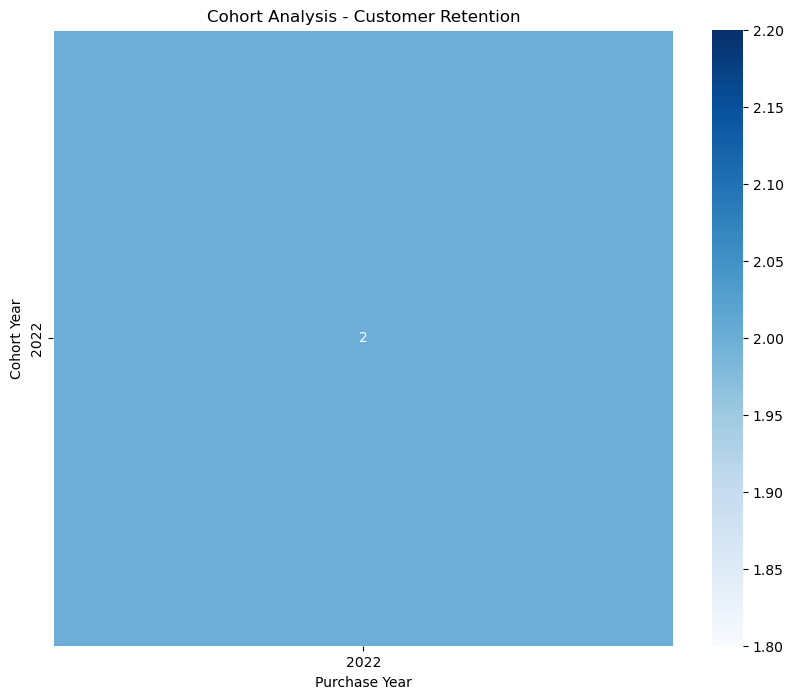

In [18]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the data
path = 'Synthetic_Software_Sales_Data.csv'
data = pd.read_csv(path)

# Convert 'Date of Sale' to datetime
data['Date of Sale'] = pd.to_datetime(data['Date of Sale'], format='%d-%m-%Y', errors='coerce')

# Drop duplicates and missing values
data.drop_duplicates(inplace=True)
data.dropna(subset=['Date of Sale'], inplace=True)

# Extract year of first purchase
data['Cohort Year'] = data.groupby('Customer Type')['Date of Sale'].transform('min').dt.year

# Create a cohort group based on the year of first purchase
cohort_data = data.groupby(['Cohort Year', data['Date of Sale'].dt.year]).agg(Unique_Customers=('Customer Type', 'nunique')).reset_index()
cohort_data.rename(columns={'Date of Sale': 'Purchase Year'}, inplace=True)

# Pivot table for cohort analysis
cohort_pivot = cohort_data.pivot_table(index='Cohort Year', columns='Purchase Year', values='Unique_Customers', aggfunc='sum')

# Fill NaN with 0 for better visualization
cohort_pivot.fillna(0, inplace=True)
print('Cohort analysis table:')

# Create a heatmap for the cohort analysis
plt.figure(figsize=(10, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='Blues', linewidths=.5)
plt.title('Cohort Analysis - Customer Retention')
plt.ylabel('Cohort Year')
plt.xlabel('Purchase Year')
plt.show()

# Predictive Model

In [19]:
# Handle missing values (null values)
# Convert date column to datetime format (assuming format is dd-mm-YYYY)
data["Date of Sale"] = pd.to_datetime(data["Date of Sale"], format="%d-%m-%Y", errors="coerce")  # Handle errors appropriately


In [20]:
# Impute missing values
numeric_columns = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]
categorical_columns = [col for col in data.columns if col not in numeric_columns and col != "Date of Sale"]

In [21]:
numeric_imputer = SimpleImputer(strategy="mean")
categorical_imputer = SimpleImputer(strategy="most_frequent")

In [22]:
# Apply imputation
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

In [23]:
# One-hot encode categorical columns (excluding date columns)
encoder = OneHotEncoder(handle_unknown='ignore')
data_encoded = encoder.fit_transform(data[categorical_columns])

In [24]:
# Convert to DataFrame and concatenate with numeric columns
encoded_columns = encoder.get_feature_names_out(categorical_columns)
#print("Encoded Columns: ", encoded_columns)
data_encoded = pd.DataFrame(data_encoded.toarray(), columns=encoded_columns)
numeric_data = data[numeric_columns]
data_final = pd.concat([numeric_data, data_encoded], axis=1)


In [25]:
print("Shape of numeric_data:", numeric_data.shape)
print("Shape of data_encoded before concatenation:", data_encoded.shape)


Shape of numeric_data: (3650, 4)
Shape of data_encoded before concatenation: (3650, 17)


In [26]:
# Feature selection (replace with your chosen method)
# This example uses correlation analysis
corr = data_final.corr()
important_features = corr["Sales Amount in US$"].abs() > 0.01  # Features with abs(correlation) > 0.5
important_features = important_features[important_features].index  # Get feature names
#print("Important Features", important_features)
X = data_final[important_features]
y = data_final["Sales Amount in US$"]  # Target variable

In [27]:
print(data_final.columns)


Index(['Sales Amount in US$', 'Units Sold', 'Marketing Spend in US$',
       'Cohort Year', 'Region_Asia', 'Region_Australia', 'Region_Europe',
       'Region_North America', 'Region_South America',
       'Product Type_Antivirus', 'Product Type_CRM', 'Product Type_Database',
       'Product Type_DevTools', 'Product Type_ERP',
       'Sales Channel_Direct Sales', 'Sales Channel_Online',
       'Sales Channel_Partner', 'Customer Type_Business',
       'Customer Type_Consumer', 'Returning Customer_No',
       'Returning Customer_Yes'],
      dtype='object')


In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Build the model (replace with your chosen model)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Evaluate the model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("R-Squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error (MAE): {mae:.4f}')


R-Squared: 1.0
Mean Squared Error: 5.770364072036165e-24
Mean Absolute Error (MAE): 0.0000


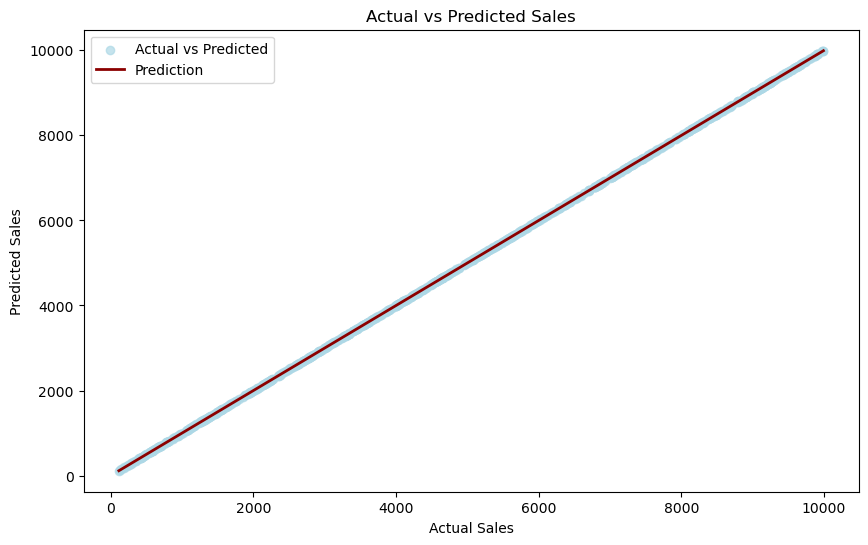

In [31]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted sales
plt.figure(figsize=(10, 6))

# Plot actual vs predicted points
plt.scatter(y_test, y_pred, color='lightblue', label='Actual vs Predicted', alpha=0.7)

# Plot the prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='-', color='darkred', linewidth=2, label='Prediction')

# Different colors for predicted lines
for actual, predicted in zip(y_test, y_pred):
    plt.plot([actual, actual], [actual, predicted], color='darkred', alpha=0.5)

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()
